In [1]:
#classification (predicting classes).

In [2]:
#MNIST dataset, which is a set of 70,000 small images of digits handwritten
#by high school students and employees of the US Cen‐ sus Bureau.
#Each image is labeled with the digit it represents.

In [3]:
import sklearn
sklearn.__version__

'0.23.2'

In [4]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True)
mnist

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'frame': None,
 'categories': {},
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixe

In [5]:
X,y = mnist['data'], mnist['target']
X.shape

(70000, 784)

In [6]:
y.shape

(70000,)

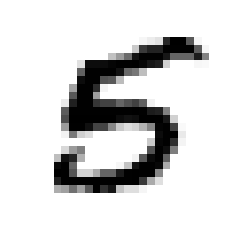

In [7]:
#There are 70,000 images, and each image has 784 features.
#This is because each image is 28×28 pixels, and each feature simply represents one pixel’s intensity, from 0 (white) to 255 (black).
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

some_digit = X[20000]
some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image, cmap = matplotlib.cm.binary,
          interpolation = "nearest")
plt.axis("off")
plt.show()

In [8]:
y[20000]

'5'

In [9]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [10]:
#Let’s also shuffle the training set; this will guarantee that all cross-validation folds will be similar
#Moreover, some learn‐ ing algorithms are sensitive to the order of the training instances
#and they perform poorly if they get many similar instances in a row.

import numpy as np
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]
X_train = X_train.astype(np.int8)
y_train = y_train.astype(np.int8)

In [11]:
#Training a Binary Classifier
#This “5-detector” will be an example of a binary classifier, capable of distinguishing between just two classes, 5 and not-5.

y_train_5 = (y_train == 5) # True for all 5s, False for all other digits. 
y_test_5 = (y_test == 5)

In [12]:
#Stochastic Gradient Descent (SGD) classifier, using Scikit-Learn’s SGDClassifier class
#This clas‐ sifier has the advantage of being capable of handling very large datasets efficiently.

from sklearn.linear_model import SGDClassifier 
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

/usr/local/anaconda3/envs/mlbook/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


SGDClassifier(random_state=42)

In [13]:
sgd_clf.predict([some_digit])

array([False])

In [14]:
from sklearn.model_selection import StratifiedKFold 
from sklearn.base import clone

In [15]:
skfolds = StratifiedKFold(n_splits=3, random_state=42)
for train_index, test_index in skfolds.split(X_train, y_train_5): 
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = (y_train_5[train_index])
    X_test_fold = X_train[test_index] 
    y_test_fold = (y_train_5[test_index])
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred)) # prints 0.9502, 0.96565 and 0.96495

/usr/local/anaconda3/envs/mlbook/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/anaconda3/envs/mlbook/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


0.89345


/usr/local/anaconda3/envs/mlbook/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


0.8906
0.89375


In [16]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

/usr/local/anaconda3/envs/mlbook/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/anaconda3/envs/mlbook/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


array([0.89345, 0.8906 , 0.89375])

In [17]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X),1),dtype = bool)

In [18]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.90875, 0.90915, 0.91105])

In [19]:
#This demonstrates why accuracy is generally not the preferred performance measure for classifiers,
# especially when you are dealing with skewed datasets (i.e., when some classes are much more frequent than others).

In [20]:
#A much better way to evaluate the performance of a classifier is to look at the confusion matrix. 
#The general idea is to count the number of times instances of class A are classified as class B.
#For example, to know the number of times the classifier confused images of 5s with 3s,
#you would look in the 5th row and 3rd column of the confusion matrix.

#To compute the confusion matrix, you first need to have a set of predictions, so they can be compared to the actual targets.
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

/usr/local/anaconda3/envs/mlbook/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/anaconda3/envs/mlbook/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [21]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[52980,  1599],
       [ 4845,   576]])

In [22]:
#Each row in a confusion matrix represents an actual class, while each column repre‐ sents a predicted class. 
#The first row of this matrix considers non-5 images (the nega‐ tive class): 
#53,056 of them were correctly classified as non-5s (they are called true negatives),
#while the remaining 1,523 were wrongly classified as 5s (false positives).
#The second row considers the images of 5s (the positive class): 
#4,854 were wrongly classified as non-5s (false negatives),
#while the remaining 567 were correctly classified as 5s (true positives). 

#A perfect classifier would have only true positives and true negatives, 
#so its confusion matrix would have nonzero values only on its main diago‐ nal (top left to bottom right):

In [23]:
#An interesting one to look at is the accuracy of the positive pre‐ dictions;
#this is called the precision of the classifier

#precision = TP/(TP+FP)
#TP is the number of true positives, and FP is the number of false positives.

#precision is typically used along with another metric named recall, also called sensitivity or true positive rate (TPR)
#recall = TP/(TP+FN)
#FN is the number of false negatives

In [24]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred)

0.26482758620689656

In [25]:
recall_score(y_train_5, y_train_pred)

0.10625345877144439

In [26]:
#It is often convenient to combine precision and recall into a single metric called the F1 score
# in particular if you need a simple way to compare two classifiers.
#The F1 score is the harmonic mean of precision and recall
#the classifier will only get a high F1 score if both recall and precision are high.

#F1=2/(1/precision+1/recall)=TP/(TP+(FN+FP)/2)
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.15165876777251186

In [27]:
#increasing precision reduces recall, and vice versa. This is called the precision/recall tradeoff.

#Scikit-Learn does not let you set the threshold directly, but it does give you access to the decision scores that it uses to make predictions.
#Instead of calling the classifier’s predict() method, you can call its decision_function() method,
#which returns a score for each instance, and then make predictions based on those scores using any threshold you want:

y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([-126092.38467331])

In [29]:
threshold = -20000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [30]:
#This confirms that raising the threshold decreases recall!!!

#For this you will first need to get the scores of all instances in the training set using the cross_val_predict() function again,
#but this time specifying that you want it to return decision scores instead of predictions

y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method = "decision_function")

/usr/local/anaconda3/envs/mlbook/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/anaconda3/envs/mlbook/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [31]:
from sklearn.metrics import precision_recall_curve

precisions ,  recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [32]:
precisions[:-1].shape

(59997,)

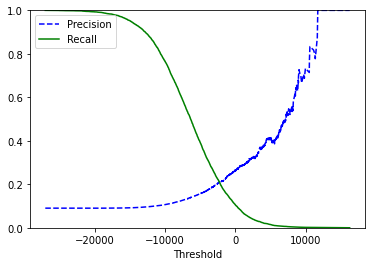

In [33]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1],"g-",label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0,1])

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [34]:
#Now you can simply select the threshold value that gives you the best precision/recall tradeoff for your task.
#Another way to select a good precision/recall tradeoff is to plot precision directly against recall

#let’s suppose you decide to aim for 90% precision.
#You look up the first plot (zooming in a bit) and find that you need to use a threshold of about 70,000.

y_train_pred_90 = (y_scores > 12000)
precision_score(y_train_5, y_train_pred_90)


1.0

In [35]:
recall_score(y_train_5, y_train_pred_90)

0.0011068068622025456

In [36]:
#!!!A high-precision classifier is not very useful if its recall is too low!

In [37]:
#The receiver operating characteristic (ROC) curve is another common tool used with binary classifiers.
#the ROC curve plots the true positive rate (another name for recall) against the false positive rate.
#The FPR is the ratio of negative instances that are incorrectly classified as positive.
#It is equal to one minus the true negative rate, which is the ratio of negative instances that are correctly classified as negative.
#The TNR is also called specificity. 
#Hence the ROC curve plots sensitivity (recall) versus 1 – specificity.

In [38]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

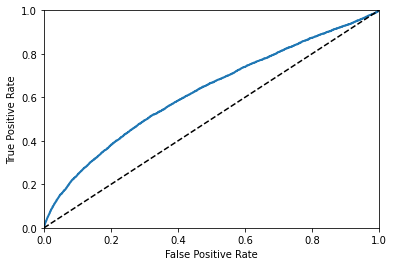

In [39]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr,tpr,linewidth=2,label = label)
    plt.plot([0,1],[0,1],'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

plot_roc_curve(fpr,tpr)
plt.show()

In [40]:
#there is a tradeoff: the higher the recall (TPR), the more false positives (FPR) the classifier produces. 
#The dotted line represents the ROC curve of a purely random classifier;
#a good classifier stays as far away from that line as possible (toward the top-left corner).

#One way to compare classifiers is to measure the area under the curve (AUC).
#A per‐ fect classifier will have a ROC AUC equal to 1, whereas a purely random classifier will have a ROC AUC equal to 0.5.

from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.6246812806446977

In [41]:
#Let’s train a RandomForestClassifier and compare its ROC curve and ROC AUC score to the SGDClassifier.
#the RandomForestClassi fier class does not have a decision_function() method.
#the RandomForestClassi fier class has a pre dict_proba() method.
#The predict_proba() method returns an array containing a row per instance and a col‐ umn per class,
#each containing the probability that the given instance belongs to the given class

from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")

In [42]:
y_scores_forest = y_probas_forest[:,1] #score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

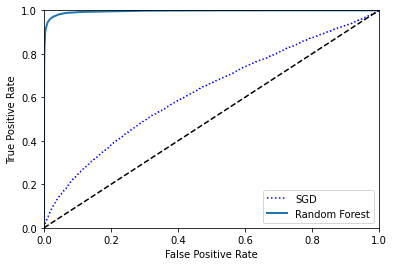

In [43]:
plt.plot(fpr, tpr, "b:", label = "SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

In [44]:
roc_auc_score(y_train_5, y_scores_forest)

0.9959870198797179

In [45]:
precision_score(y_train_5, y_scores_forest.round())

0.992360945333015

In [46]:
recall_score(y_train_5, y_scores_forest.round())

0.766832687695997

In [47]:
#Multiclass Classification
#Whereas binary classifiers distinguish between two classes,
#multiclass classifiers (also called multinomial classifiers) can distinguish between more than two classes.

In [48]:
#Some algorithms (such as Random Forest classifiers or naive Bayes classifiers)
#are capable of handling multiple classes directly.
#Others (such as Support Vector Machine classifiers or Linear classifiers) are strictly binary classifiers.
#However, there are various strategies that you can use to perform multiclass classification using multiple binary classifiers.

#the one-versus-all (OvA) strategy:
#one way to create a system that can classify the digit images into 10 classes (from 0 to 9) is to train 10 binary classifiers,
#one for each digit (a 0-detector, a 1-detector, a 2-detector, and so on). 
#Then when you want to classify an image, you get the decision score from each classifier for that image
#and you select the class whose classifier outputs the highest score.

#the one-versus-one (OvO) strategy.
#train a binary classifier for every pair of digits:
#one to distinguish 0s and 1s, another to distinguish 0s and 2s, another for 1s and 2s, and so on.
#If there are N classes, you need to train N × (N – 1) / 2 classifiers.

#Some algorithms (such as Support Vector Machine classifiers) scale poorly with the size of the training set, 
#so for these algorithms OvO is preferred since it is faster to train many classifiers on small training sets
#than training few classifiers on large training sets. For most binary classification algorithms, however, OvA is preferred.

#Scikit-Learn detects when you try to use a binary classification algorithm for a multi‐ class classification task, 
#and it automatically runs OvA (except for SVM classifiers for which it uses OvO). 

#try this with the SGDClassifier:
sgd_clf.fit(X_train, y_train) #y_train, not y_train_5
sgd_clf.predict([some_digit])

/usr/local/anaconda3/envs/mlbook/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


array([1], dtype=int8)

In [50]:
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([[-112478.8718391 ,    8431.70120574,   -4837.95456606,
         -73755.07032027,  -31594.07871632, -126795.52538368,
         -67248.92160734,   -7134.9062379 ,  -72899.52468377,
         -90339.02680966]])

In [51]:
np.argmax(some_digit_scores)

1

In [53]:
sgd_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int8)

In [55]:
sgd_clf.classes_[5]

5

In [58]:
#If you want to force ScikitLearn to use one-versus-one or one-versus-all, you can use the OneVsOneClassifier.
#or OneVsRestClassifier classes.
#Simply create an instance and pass a binary classifier to its constructor.
#this code creates a multi‐ class classifier using the OvO strategy, based on a SGDClassifier

from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(X_train, y_train)
ovo_clf.predict([some_digit])

array([1], dtype=int8)

In [59]:
len(ovo_clf.estimators_)

45

In [60]:
#Training aRandomForestClassifieris just as easy:
forest_clf.fit(X_train, y_train)
forest_clf.predict([some_digit])

array([5], dtype=int8)

In [69]:
forest_clf.predict_proba([some_digit])

array([[0.06, 0.1 , 0.06, 0.13, 0.09, 0.21, 0.1 , 0.1 , 0.03, 0.12]])

In [70]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

/usr/local/anaconda3/envs/mlbook/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/anaconda3/envs/mlbook/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


array([0.3212, 0.3231, 0.3254])

In [71]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.28365, 0.2862 , 0.2988 ])

In [72]:
#we will assume that you have found a promising model and you want to find ways to improve it.
#One way to do this is to analyze the types of errors it makes.

#You need to make predictions using the cross_val_predict() function, then call the confusion_matrix() function

y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[2197,  337,  482,  427,  344,  468,  569,  403,  414,  282],
       [ 255, 3138,  541,  406,  288,  371,  432,  494,  521,  296],
       [ 519,  596, 1432,  626,  423,  348,  670,  489,  543,  312],
       [ 440,  554,  662, 1851,  346,  529,  378,  503,  557,  311],
       [ 417,  525,  504,  352, 1191,  489,  478,  772,  478,  636],
       [ 529,  480,  418,  624,  405, 1011,  459,  487,  591,  417],
       [ 552,  529,  665,  316,  457,  355, 1957,  372,  434,  281],
       [ 368,  602,  395,  493,  520,  383,  388, 2017,  362,  737],
       [ 474,  581,  522,  584,  384,  632,  451,  448, 1360,  415],
       [ 387,  504,  374,  381,  723,  428,  366, 1012,  555, 1219]])

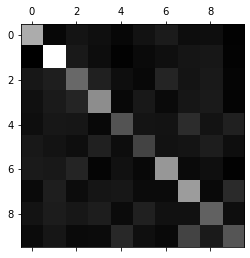

In [73]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

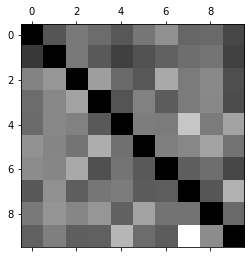

In [74]:
#First, you need to divide each value in the confusion matrix by the number of images in the corresponding class,
#so you can compare error rates instead of absolute number of errors
#(which would make abundant classes look unfairly bad):

row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx/row_sums

np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

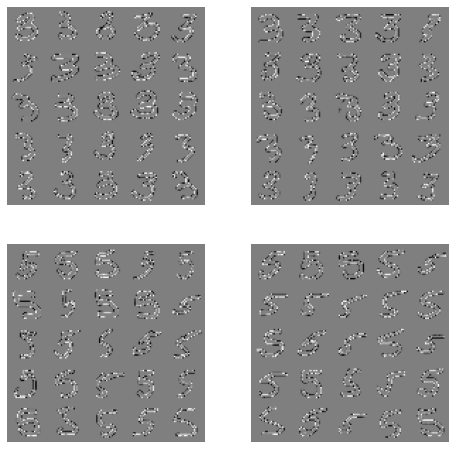

In [77]:
#The columns for classes 8 and 9 are quite bright, which tells you that many images get misclassified as 8s or 9s.
#Similarly, the rows for classes 8 and 9 are also quite bright, telling you that 8s and 9s are often confused with other digits.
#Conversely, some rows are pretty dark, such as row 1: 
#This means that most 1s are classified correctly (a few are confused with 8s, but that’s about it).

#it seems that your efforts should be spent on improving classification of 8s and 9s,
#as well as fixing the specific 3/5 confusion.
#For example, you could try to gather more training data for these digits. 
#Or you could engineer new features that would help the classifier
#—for example, writing an algorithm to count the number of closed loops (e.g., 8 has two, 6 has one, 5 has none).
#Or you could preprocess the images (e.g., using Scikit-Image, Pillow, or OpenCV)
#to make some patterns stand out more, such as closed loops.

#Analyzing individual errors can also be a good way to gain insights on what your classifier is doing and why it is failing,
# but it is more difficult and time-consuming. For example, let’s plot examples of 3s and 5s:

def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")
    
cl_a , cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
plt.show()

In [78]:
#Multilabel Classification
#In some cases you may want your classifier to output multiple classes for each instance.
#Say the classifier has been trained to recognize three faces, Alice, Bob, and Charlie;
#then when it is shown a picture of Alice and Charlie,
#it should output [1, 0, 1] (meaning “Alice yes, Bob no, Charlie yes”).

#simpler example for illustration purposes:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >=7 )
y_train_odd = (y_train % 2 ==1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [88]:
knn_clf.predict([some_digit])

array([[False, False]])

In [ ]:
#many ways to evaluate a multilabel classifier, and selecting the right metric really depends on your project.
#one approach is to measure the F1 score for each individual label (or any other binary classifier metric discussed earlier),
#then simply compute the average score. 

y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_train, cv=3)
f1_score(y_train, y_train_knn_pred, average="macro")

In [ ]:
#This assumes that all labels are equally important, which may not be the case.
#In particular, if you have many more pictures of Alice than of Bob or Charlie, 
#you may want to give more weight to the classifier’s score on pictures of Alice.
#One simple option is to give each label a weight equal to its support 
#(i.e., the number of instances with that target label). 
#To do this, simply set average="weighted" in the preceding code.

In [ ]:
#Multioutput Classification
#It is simply a generalization of multilabel classification where each label can be multiclass
#(i.e., it can have more than two possible values).

#To illustrate this, let’s build a system that removes noise from images.
#It will take as input a noisy digit image, and it will (hopefully) output a clean digit image, 
#represented as an array of pixel intensities, just like the MNIST images.
#Notice that the classifier’s output is multilabel (one label per pixel) 
#and each label can have multiple values (pixel intensity ranges from 0 to 255).

#Let’s start by creating the training and test sets by taking the MNIST images
#and adding noise to their pixel intensities using NumPy’s randint() function.

noise = rnd.randint(0,100, (len(X_train), 784))
noise = rnd.randint(0,100, (len(X_test), 784))
X_train_mod = X_train + noise
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

In [ ]:
#let’s train the classifier and make it clean this image
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[some_index]])
plot_digit(clean_digit)